## Leitura e análise inicial dos dados

Utilizando o DataSet já limpo eu o importo a partir do arquivo 2019-09-01_sigesguarda_-_Base_de_Dados-limpo.csv.

In [2]:
#importação de bibliotecas
import pandas as pd

%matplotlib inline

# lê o arquivo CSV da guarda municipal
df = pd.read_csv('data/2019-10-01_sigesguarda_-_Base_de_Dados-limpo.csv', encoding='utf-8', sep=',', low_memory=False)

Visualizando algumas linhas de dados

In [3]:
df.head(15)

,ATENDIMENTO_BAIRRO_NOME,NATUREZA1_DESCRICAO,SUBCATEGORIA1_DESCRICAO,OCORRENCIA_DATA,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME
0,cidade industrial,alarmes,disparo de alarme,2009-01-01 15:14:00,SIGA,cidade industrial
1,fazendinha,roubo,transeunte,2009-01-01 15:22:00,153,portão
2,uberaba,animais,cão solto em via pública,2009-01-01 15:59:00,156,cajuru
3,sítio cercado,animais,cão solto em via pública,2009-01-01 16:13:00,156,bairro novo
4,tatuquara,alarmes,disparo de alarme,2009-01-01 16:29:00,SIGA,pinheirinho
5,sítio cercado,alarmes,disparo de alarme,2009-01-01 14:00:00,SIGA,bairro novo
6,santa cândida,trânsito,acidente de trânsito,2009-01-01 16:45:00,IMEDIATA,boa vista
7,boqueirão,alarmes,disparo de alarme,2009-01-01 17:45:00,SIGA,boqueirão
8,centro,roubo,transeunte,2009-01-01 14:20:00,IMEDIATA,matriz
9,boa vista,invasão,invasão de equipamento/patrimônio público,2009-01-01 18:04:00,156,boa vista


Comeco a analise agrupando o numero de ocorrencias pela regional e com pego o maior numero de ocorrencias e o menor numero e depois como podemos ver no grafico a regional matriz e disparadamente a que mais atende ocorrencias.

In [4]:
#Regional com o MAIOR numero de ocorrencias
df.groupby("REGIONAL_FATO_NOME").size().idxmax()

'matriz'

In [5]:
#MAIOR numero de ocorrencias
df.groupby("REGIONAL_FATO_NOME").size().max()

76144

In [6]:
#Regional com o MENOR numero de ocorrencias
df.groupby("REGIONAL_FATO_NOME").size().idxmin()

'região metropolitana'

In [7]:
#MENOR numero de ocorrencias
df.groupby("REGIONAL_FATO_NOME").size().min()

111

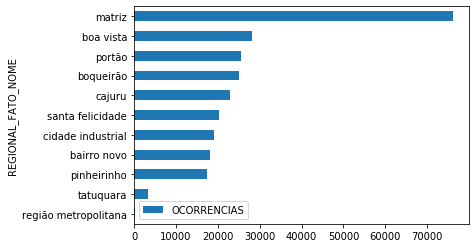

In [8]:
df_regional = df.groupby("REGIONAL_FATO_NOME").size().reset_index(name='OCORRENCIAS')
df_regional = df_regional.sort_values('OCORRENCIAS')
df_regional.plot.barh(x='REGIONAL_FATO_NOME', y='OCORRENCIAS')

E abaixo podemos ver a mesma analise com um grafico com os canais mais utilizados para registro de ocorrencias

In [9]:
#CANAL mais utilizado para abrir ocorrencias
df.groupby("ORIGEM_CHAMADO_DESCRICAO").size().idxmax()

'153'

In [10]:
#Numero de ocorrencias abertas por esse canal
df.groupby("ORIGEM_CHAMADO_DESCRICAO").size().max()

100471

In [11]:
#CANAL menos utilizado para abrir ocorrencias
df.groupby("ORIGEM_CHAMADO_DESCRICAO").size().idxmin()

'CENTRAL DE FLAGRANTES'

In [12]:
#Numero de ocorrencias atendidades por esse canal
df.groupby("ORIGEM_CHAMADO_DESCRICAO").size().min()

2

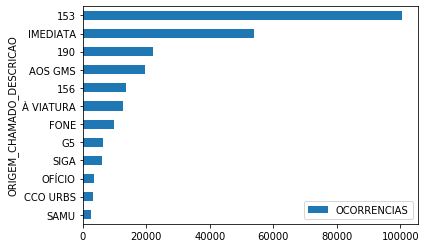

In [13]:
df_canal = df.groupby("ORIGEM_CHAMADO_DESCRICAO").size().reset_index(name='OCORRENCIAS')
df_canal = df_canal.sort_values('OCORRENCIAS')
df_canal = df_canal[df_canal['OCORRENCIAS'] > 1000]
df_canal.plot.barh(x='ORIGEM_CHAMADO_DESCRICAO', y='OCORRENCIAS')

Olhando o grafico conseguimos perceber os meios mais utilizados para abrir ocorrencias

Comecando a analise com os bairros e podemos ver os bairros em que mais se abrem ocorrencias

In [14]:
#Bairro com MAIOR numero de ocorrencias abertas
df.groupby("ATENDIMENTO_BAIRRO_NOME").size().idxmax()

'centro'

In [15]:
#Numero de ocorrencias abertas neste bairro
df.groupby("ATENDIMENTO_BAIRRO_NOME").size().max()

40910

In [16]:
#Bairro com MENOR numero de ocorrencias abertas
df.groupby("ATENDIMENTO_BAIRRO_NOME").size().idxmin()

'campo de são benedito'

In [17]:
#Numero de ocorrencias abertas neste bairro
df.groupby("ATENDIMENTO_BAIRRO_NOME").size().min()

1

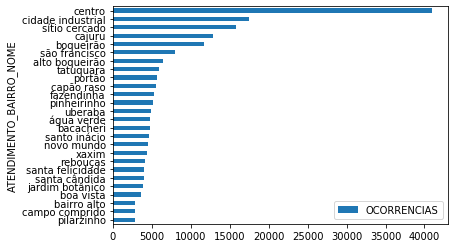

In [18]:
df_bairro_g = df.groupby("ATENDIMENTO_BAIRRO_NOME").size().reset_index(name='OCORRENCIAS')
df_bairro_g = df_bairro_g.sort_values('OCORRENCIAS')
df_bairro_g = df_bairro_g[df_bairro_g['OCORRENCIAS'] > 2800]
df_bairro_g.plot.barh(x='ATENDIMENTO_BAIRRO_NOME', y='OCORRENCIAS')

Comecando a analise com da natureza das ocorrencias

In [19]:
#Natureza com mais ocorrencias abertas
df.groupby("NATUREZA1_DESCRICAO").size().idxmax()

'apoio'

In [20]:
#Numero de maximo de ocorrencias 
df.groupby("NATUREZA1_DESCRICAO").size().max()

38436

In [21]:
#Natureza com menos ocorrencias abertas
df.groupby("NATUREZA1_DESCRICAO").size().idxmin()

'corrupção ativa'

In [22]:
#Numero de maximo de ocorrencias 
df.groupby("NATUREZA1_DESCRICAO").size().min()

1

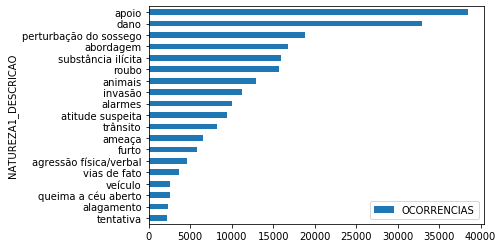

In [23]:
df_bairro_n = df.groupby("NATUREZA1_DESCRICAO").size().reset_index(name='OCORRENCIAS')
df_bairro_n = df_bairro_n.sort_values('OCORRENCIAS')
df_bairro_n = df_bairro_n[df_bairro_n['OCORRENCIAS'] > 2200]
df_bairro_n.plot.barh(x='NATUREZA1_DESCRICAO', y='OCORRENCIAS')

Agora agrupamos a natureza descricao com o bairro para ver por bairro qual a natureza da ocorrencia que mais ocorre

In [47]:
df_nat_sub_g = df.groupby(['NATUREZA1_DESCRICAO','ATENDIMENTO_BAIRRO_NOME']).size().reset_index(name='OCORRENCIAS')
df_nat_sub_g

,NATUREZA1_DESCRICAO,ATENDIMENTO_BAIRRO_NOME,OCORRENCIAS
0,abalo sísmico,bigorrilho,1
1,abalo sísmico,centro,1
2,abandono de função,alto boqueirão,1
3,abandono de função,são francisco,1
4,abandono de função,água verde,1
...,...,...,...
5567,órgãos acionados,hauer,1
5568,órgãos acionados,pinheirinho,1
5569,órgãos acionados,rebouças,1
5570,órgãos acionados,santa cândida,1


Geramos um grafico para comparar as 3 variaveis

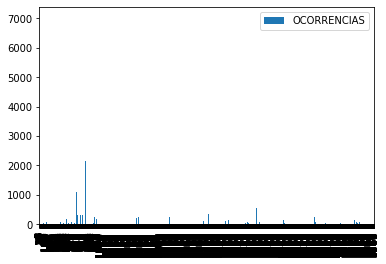

In [50]:
df_nat_sub_g.plot.bar()